# ASSIGNMENT 1 
#### ANWESHA PAUL <BR> MDS202213

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image

## PROBLEM 1

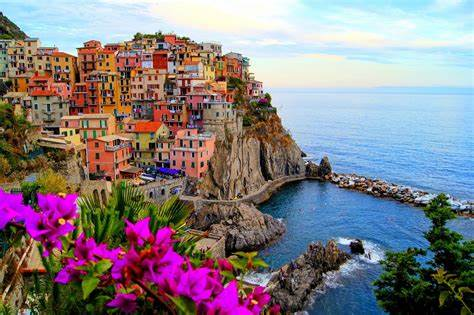

In [2]:
# Load the image
image = cv2.imread('CinqueTerre.jpg')

# Display the image
Image(filename="CinqueTerre.jpg")

### 1.1. Size and Number of Channels of an Image

In [3]:
height, width, _ = image.shape
num_channels = image.shape[2] if len(image.shape) == 3 else 1

# Print image size and number of channels
print(f"Image size: {width}x{height}")
print(f"Number of channels: {num_channels}")


Image size: 474x315
Number of channels: 3



### 1.2. Accessing sub-regions of an image

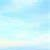

In [4]:
# Extract sub-image from the top-right corner (50x50)
subimg1 = image[:50, (width - 50) : width]

# Save and display the sub-image
cv2.imwrite('top_right_subimg.jpg', subimg1)
Image(filename='top_right_subimg.jpg')

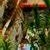

In [5]:
# Extract sub-image from the bottom-left corner (50x50)
subimg2 = image[(height - 50) : height, :50]

# Save and display the sub-image
cv2.imwrite('bottom_left_subimg.jpg', subimg2)
Image(filename='bottom_left_subimg.jpg')

### 1.3. Sum of Squared Differences

In [6]:
# Define a function to calculate Sum of Squared Differences (SSD)
calculate_ssd = lambda x,y: ((x.astype(int)-y.astype(int))**2).sum()

# Convert sub-images to grayscale
subimg1 = cv2.cvtColor(subimg1, cv2.COLOR_BGR2GRAY)
subimg2 = cv2.cvtColor(subimg2, cv2.COLOR_BGR2GRAY)

# Calculate and the SSD between the two sub-images
print("Sum of Squared Differences:", calculate_ssd(subimg1, subimg2))

Sum of Squared Differences: 66270459


## PROBLEM 2

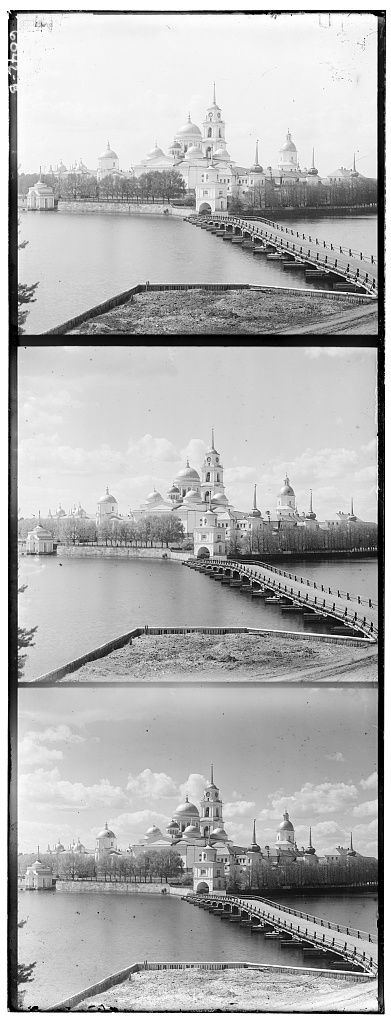

In [7]:
# Load the grayscale image
image = cv2.imread('monastery.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
Image(filename = 'monastery.jpg', width = 250)

In [8]:
# Calculate image height and width
height, width = image.shape

# Divide the image into three equal parts vertically
third_height = height // 3

# Extract blue, green, and red channels
blue_channel = image[0:third_height, :]
green_channel = image[third_height:2*third_height, :]
red_channel = image[2*third_height:, :]

# Print shapes of channels
print('Blue:', blue_channel.shape)
print('Green:', green_channel.shape)
print('Red', red_channel.shape)

Blue: (341, 391)
Green: (341, 391)
Red (342, 391)


Note: We need to adjust the shape of the red channel so that we can merge the channels.

In [9]:
# Adjust the shape of the red channel for merging
red_channel = image[2*third_height:-1, :]

print(red_channel.shape)

(341, 391)


### 2.1. Merging the Channels to obtain the Actual Image

(341, 391, 3)


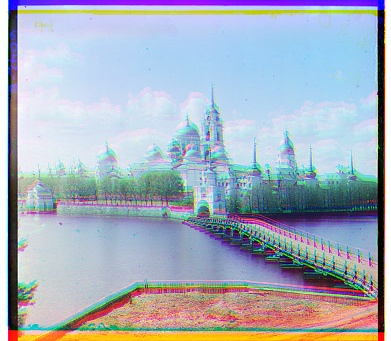

In [10]:
# Merge the channels
merged_image = cv2.merge((blue_channel, green_channel, red_channel))
print(merged_image.shape)

# Save and display the merged image
cv2.imwrite('merged_image.jpg', merged_image)
Image(filename = "merged_image.jpg")

#### 2.2. Aligning one Channel over another using a Sliding Window Approach to find the Best Displacement.


In [11]:
def translate_image(image, dy, dx):
    """
        Translate the image vertically and horizontally by given displacements
    """
    # Perform vertical translation
    new_image = np.roll(image, dy, axis=0)
    if dy > 0:
        new_image[0:dy, :] = 0
    elif dy < 0:
        new_image[dy:, :] = 0
    
    # Perform horizontal translation
    new_image = np.roll(new_image, dx, axis=1)
    if dx > 0:
        new_image[:, 0:dx] = 0
    elif dx < 0:
        new_image[:, dx:] = 0

    return new_image

In [12]:
def align_image(bottom_image, top_image):
    """
        Aligns the top image over the bottom image using a sliding window approach to find the best displacement
    """
    # Initialize minimum SSD score
    min_ssd = float('inf')
    best_alignment, best_displacement = None, None

    # Loop through possible displacements
    for vertical_shift in range(-10, 11):
        for horizontal_shift in range(-10, 11):
            # Translate the top image
            translated_top = translate_image(top_image, vertical_shift, horizontal_shift)
            
            # Remove 10 pixels from each side to remove noise at the borders
            cropped_translated_top = translated_top[10:-10, 10:-10]
            cropped_bottom = bottom_image[10:-10, 10:-10]
            
            # Calculate SSD
            ssd = calculate_ssd(cropped_bottom, cropped_translated_top)
            
            # Update best alignment if SSD is minimized
            if ssd <= min_ssd:
                best_alignment = translated_top
                min_ssd = ssd
                best_displacement = [vertical_shift, horizontal_shift]

    return best_alignment, best_displacement, min_ssd

In [13]:
# Align green channel over blue channel
aligned_green_channel, best_displacement_green, best_score_green = align_image(blue_channel, green_channel)

# Align red channel over blue channel
aligned_red_channel, best_displacement_red, best_score_red = align_image(blue_channel, red_channel)

# Print alignment information for green and red channels
print(f'Green Channel: \nDisplacement= {best_displacement_green} \nSSD= {best_score_green}')
print(f'\nRed Channel: \nDisplacement= {best_displacement_red} \nSSD= {best_score_red}')

Green Channel: 
Displacement= [-3, 2] 
SSD= 170560109

Red Channel: 
Displacement= [3, 2] 
SSD= 393251836


#### 2.3. Merging the Channels into a Single Color Image

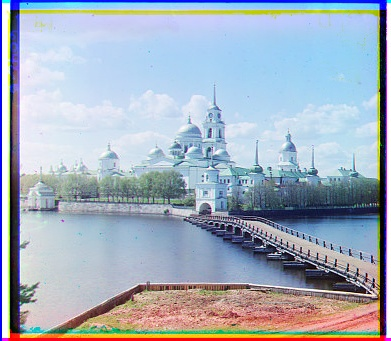

In [14]:
# Merge the aligned channels into a single color image
best_alignment = cv2.merge((blue_channel, aligned_green_channel, aligned_red_channel))

# Save and display the final aligned image
cv2.imwrite('best_alignment.jpg', best_alignment)
Image(filename = "best_alignment.jpg")

### 2.4. Comparison

(-0.5, 390.5, 340.5, -0.5)

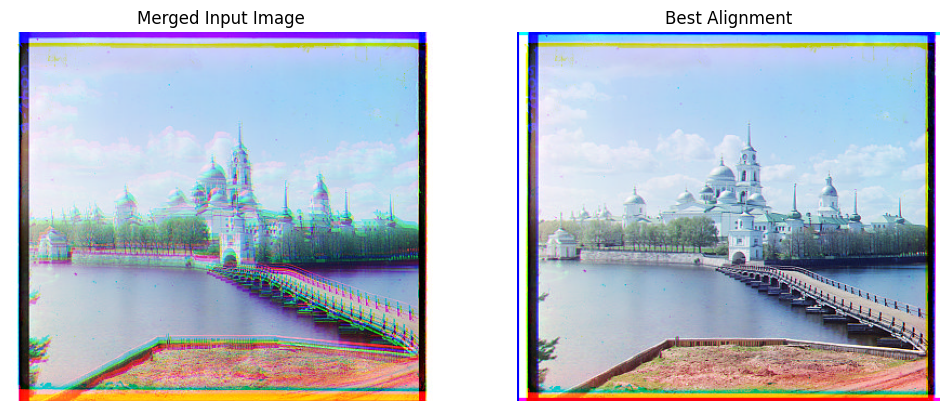

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (12, 8))

# Original image
axes[0].imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Merged Input Image')
axes[0].axis('off')

# Best alignment
axes[1].imshow(cv2.cvtColor(best_alignment, cv2.COLOR_BGR2RGB))
axes[1].set_title('Best Alignment')
axes[1].axis('off')

## PROBLEM 5
#### 5.1. The Rotating Snakes Illusion

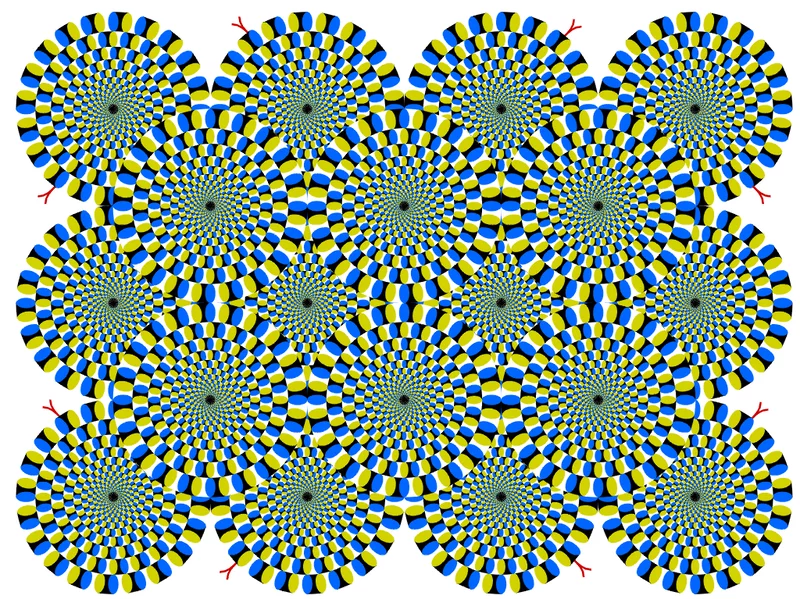

In [16]:
Image(filename = 'TheRotatingSnakes.jpg', width = 350)

The Rotating Snakes illusion is an example of how the human visual system interprets static images as dynamic motion through a combination of neural adaptation, image decomposition, and global motion detection mechanisms. Neurons in the visual system adapt to different rates of contrast within the image, leading to perceived shifts in neural activity and the illusion of motion. Additionally, the visual system decomposes images into separate representations at various spatial scales, with motion detected independently within each scale. Specialized mechanisms for detecting global motion further contribute to the perception of coherent rotation, even when fine details remain static.

#### 5.2. The Floating Star Illusion

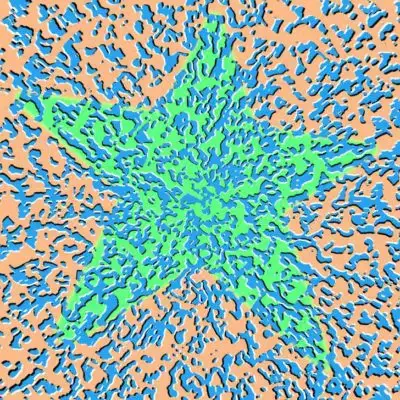

In [17]:
Image(filename = 'floating_star.jpg', width = 350)

The floating star illusion, also scientifically known as the Troxler effect, is a fascinating phenomenon wherein stationary objects appear to shift or flicker after prolonged staring. This illusion stems from visual adaptation, a process where the sensitivity of eye cells diminishes over time when exposed to the same stimulus. Consequently, when fixating on a single point, signals from that area weaken in comparison to surrounding regions, creating a perceptual contrast that gives the impression of movement or flickering in stationary objects. Essentially, this illusion shows how our eyes and brain work together to perceive the world around us, adjusting to changes in what we see.